<a href="https://colab.research.google.com/github/JacksonReber/BuildWeek/blob/master/Copy_of_Copy_of_Build_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
from statsmodels.formula.api import ols


In [270]:
us_state_abbrev = {
    'Alabama': 1,
    'Alaska': 2,
    'Arizona': 3,
    'Arkansas': 4,
    'California': 5,
    'Colorado': 6,
    'Connecticut': 7,
    'Delaware': 8,
    'Florida': 9,
    'Georgia': 10,
    'Hawaii': 11,
    'Idaho': 12,
    'Illinois': 13,
    'Indiana': 14,
    'Iowa': 15,
    'Kansas': 16,
    'Kentucky': 17,
    'Louisiana': 18,
    'Maine': 19,
    'Maryland': 20,
    'Massachusetts': 21,
    'Michigan': 22,
    'Minnesota': 23,
    'Mississippi': 24,
    'Missouri': 25,
    'Montana': 26,
    'Nebraska': 27,
    'Nevada': 28,
    'New Hampshire': 29,
    'New Jersey': 30,
    'New Mexico': 31,
    'New York': 32,
    'North Carolina': 33,
    'North Dakota': 34,
    'Ohio': 35,
    'Oklahoma': 36,
    'Oregon': 37,
    'Pennsylvania': 38,
    'Rhode Island': 39,
    'South Carolina': 40,
    'South Dakota': 41,
    'Tennessee': 42,
    'Texas': 43,
    'Utah': 44,
    'Vermont': 45,
    'Virginia': 46,
    'Washington': 47,
    'West Virginia': 48,
    'Wisconsin': 49,
    'Wyoming': 50,
    'District of Columbia': 51
}


In [271]:
df = pd.merge(pd.read_csv('naep.csv'), 
                 pd.read_csv('states.csv'))
df1 = pd.read_csv('districts.csv')
def wrangle(df):
  df['AVG_SCORE'] = pd.to_numeric(df['AVG_SCORE'], errors='coerce')
  df['AVG_SCORE'] = round(df['AVG_SCORE'], ndigits=4)
  df.set_index('YEAR', inplace=True)
  df = df.drop(index=[1992,1994, 1996, 1998, 2000, 2002], inplace=True)
  


  return df
data = wrangle(df)

In [272]:
df['STATE'] = df['STATE'].map(us_state_abbrev).fillna(df['STATE'])
one_hot_encoded_data = pd.get_dummies(df, columns = ['TEST_SUBJECT'])
df = df.merge(one_hot_encoded_data)
df = df.drop(columns='TEST_SUBJECT')

In [221]:
#this converts all 50 states into a numeric value from 1 - 50



In [283]:
df1.head()


,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [240]:
df.head()

,STATE,AVG_SCORE,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,TEST_SUBJECT_Mathematics,TEST_SUBJECT_Reading
0,1,230.9774,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,1,0
1,1,266.5553,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,1,0
2,1,217.0491,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,0,1
3,1,258.7538,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,0,1
4,2,236.3284,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914,1,0


In [273]:
target = 'AVG_SCORE'
y = df[target]
X = df.drop(target, axis=1)

In [242]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state=42)

<function matplotlib.pyplot.show>

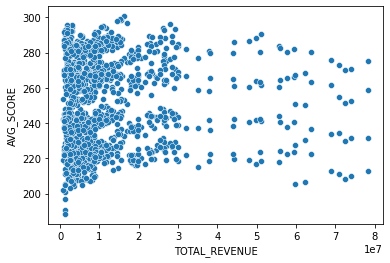

In [284]:
sns.scatterplot(data=df, x='TOTAL_REVENUE', y='AVG_SCORE')
plt.show

In [225]:
#training data between 2003 - 2007
#train_mask = X.index < 2008
#X_train, y_train = X.loc[train_mask], y.loc[train_mask]

# validation data during between 2009 and 2013
#val_mask = (df.index <= 2013) & (df.index >= 2009)
#X_val, y_val = X.loc[val_mask], y.loc[val_mask]

# test data for year 2015
#test_mask = X.index >= 2014
#X_test, y_test = X.loc[test_mask], y.loc[test_mask]

In [262]:
model = ols('AVG_SCORE ~ TOTAL_REVENUE', data=df).fit()
intercept = model.params[0]
slope = model.params[1]
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AVG_SCORE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05891
Date:                Tue, 20 Jul 2021   Prob (F-statistic):              0.808
Time:                        18:44:36   Log-Likelihood:                -6586.4
No. Observations:                1428   AIC:                         1.318e+04
Df Residuals:                    1426   BIC:                         1.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       250.7105      0.835    300.336

In [243]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
y_pred = clf.predict(X_test)
y_pred

array([274.87419896, 279.40312599, 224.12803893, 261.69449497,
       280.53261519, 280.88860146, 237.52481303, 263.95676935,
       219.27059438, 218.10075597, 247.232636  , 219.62408585,
       219.53674357, 219.80513889, 220.11677828, 220.97999393,
       218.57275219, 221.07948354, 220.03157835, 262.50175641,
       262.02126009, 220.21074374, 237.26351414, 268.97479616,
       239.23827771, 241.24567513, 240.31725073, 221.71086798,
       280.57036421, 219.90690436, 263.08973931, 281.55246375,
       264.62814643, 236.40516147, 262.17610575, 219.66152561,
       237.68054889, 222.13049296, 281.7767534 , 221.08052001,
       282.60806163, 235.92947345, 220.37430728, 236.57938339,
       268.64793663, 259.16330132, 281.63206341, 283.65497072,
       238.57596071, 219.43078812, 260.21841956, 280.66055058,
       285.77694207, 279.62650738, 280.3035993 , 220.38151537,
       262.031327  , 237.99568827, 222.17460224, 238.54030954,
       221.34992666, 219.74226422, 279.74366283, 236.23

In [259]:
clf.score(X_test, y_test)

0.9386130884493306

In [255]:
RMS = mean_squared_error(y_test, y_pred)
RMS

37.39839168957875

In [258]:
y_test

123     270.8537
1189    270.5246
462     219.3575
351     261.9315
1009    270.0841
665     282.4314
756     236.7810
527     272.0786
70      228.0552
554     215.4776
332     240.3498
994     221.2614
1182    213.2035
1066    209.5788
310     222.9827
1306    218.6738
218     218.5239
78      223.7286
270     223.3864
51      268.5535
67      266.7655
370     217.9307
1164    233.9553
629     270.4486
76      242.2447
344     245.5498
184     246.6126
798     226.5276
1213    269.0995
862     213.4966
163     260.3314
1097    281.0585
1251    267.2181
736     230.0296
963     259.5472
1214    214.7671
44      237.8958
198     223.3564
1317    290.6801
1138    227.4383
1013    285.6179
852     242.0203
1222    223.2621
1092    230.2312
1379    264.2674
339     264.5410
29      279.8102
901     297.9233
1080    239.8808
382     222.7676
651     264.3620
49      283.7423
741     282.5769
613     268.5241
745     284.3326
814     222.6522
415     261.2853
1276    232.8568
874     221.67